In [1]:
from google.colab import files
uploaded = files.upload()

Saving cats_and_dogs_filtered.zip to cats_and_dogs_filtered.zip


In [2]:
import zipfile
import os

# Replace 'your_file.zip' with your actual file name
with zipfile.ZipFile("/content/cats_and_dogs_filtered.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")  # This will unzip into 'dataset/' folder

In [3]:
train_dir = 'dataset/cats_and_dogs_filtered/train'
val_dir = 'dataset/cats_and_dogs_filtered/validation'

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(150, 150),
    batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [7]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(train_ds.class_names), activation='softmax')  # For multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use this for integer-labeled classes
              metrics=['accuracy'])

model.summary()  # Check the model summary to see the

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,690 (72.61 MB)

 Trainable params: 19,034,690 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10  # You can adjust the epochs depending on your model's performance
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.5064 - loss: 143.7013 - val_accuracy: 0.5120 - val_loss: 0.6945
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5930 - loss: 0.6611 - val_accuracy: 0.5390 - val_loss: 0.7569
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.6559 - loss: 0.6103 - val_accuracy: 0.5260 - val_loss: 0.9015
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.7669 - loss: 0.4484 - val_accuracy: 0.5430 - val_loss: 1.2736
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.8068 - loss: 0.3890 - val_accuracy: 0.5650 - val_loss: 1.3076
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.8853 - loss: 0.2539 - val_accuracy: 0.5570 - val_loss: 1.8898
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.9089 - loss: 0.2683 - val_accuracy: 0.5530 - val_loss: 1.4530
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.9463 - loss: 0.1276 - val_accuracy: 0.5770 -

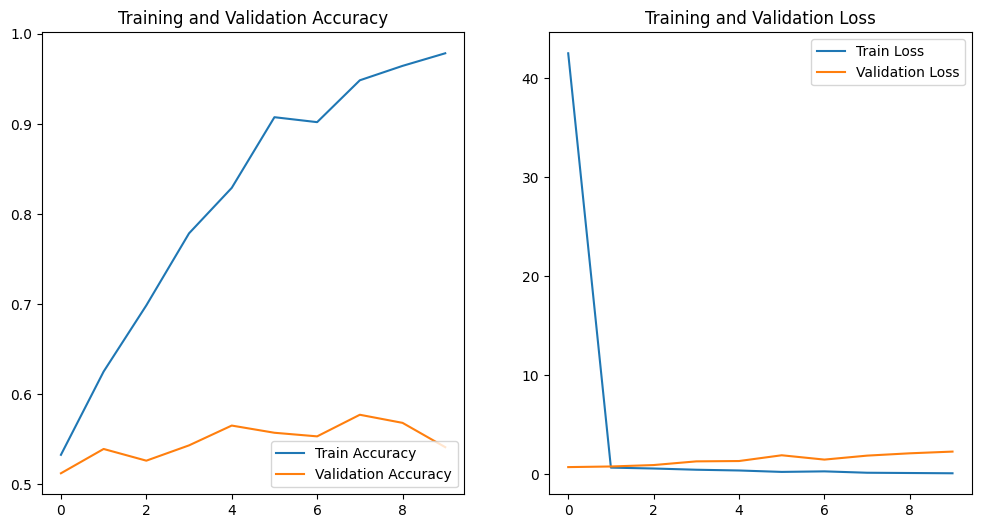

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Automatically set range based on number of epochs
epochs_range = range(len(acc))

# Create plots
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [10]:
test_loss, test_acc = model.evaluate(val_ds)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 465ms/step - accuracy: 0.5440 - loss: 2.2083
Test accuracy: 0.5410000085830688
Test loss: 2.2612602710723877
